# 3F3 Lab - RANDOM VARIABLES and RANDOM NUMBER GENERATION

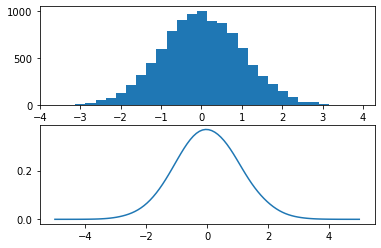

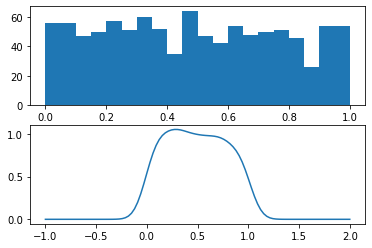

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data""" 
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf 
            u = (x - mu) / abs(sigma) 
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma))) 
            y *= np.exp(-u * u / 2) 
            return y 
        prob = [n_pdf(x_i, data, width) for x_i in x_axis] 
        pdf = [np.average(pr) for pr in prob] # each row is one x value 
        return np.array(pdf) 
    return ksd

# Plot normal distribution 
fig, ax = plt.subplots(2) 
x = np.random.randn(10000) 
ax[0].hist(x, bins=30) # number of bins

ks_density = ksdensity(x, width=0.4) 
# np.linspace(start, stop, number of steps) 
x_values = np.linspace(-5., 5., 100) 
ax[1].plot(x_values, ks_density(x_values))

# Plot uniform distribution 
fig2, ax2 = plt.subplots(2) 
x = np.random.rand(1000) 
ax2[0].hist(x, bins=20)

ks_density = ksdensity(x, width=0.1) 
x_values = np.linspace(-1., 2., 100) 
ax2[1].plot(x_values, ks_density(x_values))

plt.show()

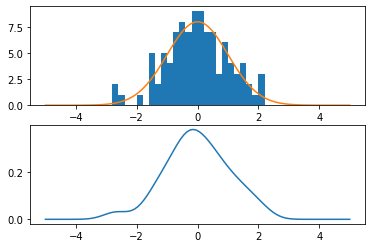

In [2]:
# Plot normal distribution 
fig, ax = plt.subplots(2) 
x = np.random.randn(100) 
ax[0].hist(x, bins=50,range=(-5,5)) # number of bins

# np.linspace(start, stop, number of steps) 
x_values = np.linspace(-5., 5., 100)

# exact distribution
y_N = (1 / (np.sqrt(2 * np.pi)))  # sigma = 1
y_N *= np.exp(-x_values * x_values / 2)
y_N *= 100 * (10/50) # Normalization constant = total area of hist
ax[0].plot(x_values, y_N)


# Result of kernal smoothing
ks_density = ksdensity(x, width=0.4)
ax[1].plot(x_values, ks_density(x_values))

plt.show()


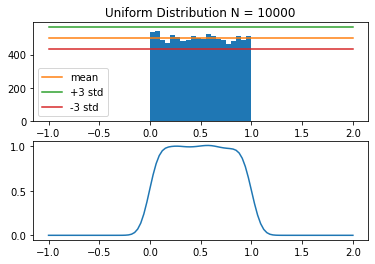

In [3]:
# Plot uniform distribution

N = 10000
num_bins=20

fig2, ax2 = plt.subplots(2) 
x = np.random.rand(N) 
ax2[0].hist(x, bins=num_bins, range=(0,1))

# In theory, mean = N/num_bins, standard deviation = N*(1-1/num_bins)/num_bins = mean * (1-1/num_bins)

# exact distribution
x_values = np.linspace(-1., 2., 100)
ax2[0].plot(x_values,(x_values*0+N/num_bins)) 
ax2[0].plot(x_values,(x_values*0+N/num_bins + 3 * np.sqrt(N*(1-1/num_bins)/num_bins)))
ax2[0].plot(x_values,(x_values*0+N/num_bins - 3 * np.sqrt(N*(1-1/num_bins)/num_bins)))

# Result of kernal smoothing
x_values = np.linspace(-1., 2., 100)
ks_density = ksdensity(x, width=0.08)
ax2[1].plot(x_values, ks_density(x_values))

ax2[0].legend(["mean", "+3 std", "-3 std"])
ax2[0].set_title("Uniform Distribution N = " + str(N))

plt.show()



# 2. Functions of random variables

'\n# In theory, mean = N/num_bins, standard deviation = N*(1-1/num_bins)/num_bins = mean * (1-1/num_bins)\n\n# exact distribution\nx_values = np.linspace(-1., 2., 100)\nax2[0].plot(x_values,(x_values*0+N/num_bins)) \nax2[0].plot(x_values,(x_values*0+N/num_bins + 3 * np.sqrt(N*(1-1/num_bins)/num_bins)))\nax2[0].plot(x_values,(x_values*0+N/num_bins - 3 * np.sqrt(N*(1-1/num_bins)/num_bins)))\n\n# Result of kernal smoothing\nx_values = np.linspace(-1., 2., 100)\nks_density = ksdensity(x, width=0.08)\nax2[1].plot(x_values, ks_density(x_values))\n\nax2[0].legend(["mean", "+3 std", "-3 std"])\nax2[0].set_title("Uniform Distribution N = " + str(N))\n\nplt.show()\n'

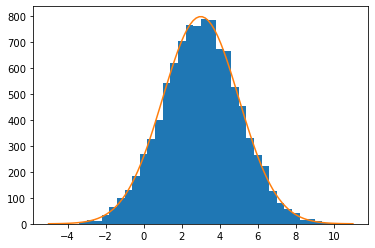

In [4]:
# y = a * x + b

N = 10000
num_bins=40

a = 2
b = 3

fig3, ax3 = plt.subplots(1) 
x = np.random.randn(N) 
y = a*x+b
ax3.hist(y, bins=num_bins, range=(-4*a+b,4*a+b))

# exact distribution
sigma = a
mean = b
x_values = np.linspace(-4.*sigma+mean, 4.*sigma+mean, 100)
y_exact = (1 / (np.sqrt(2 * np.pi) * sigma))  # sigma = 1
y_exact *= np.exp(-((x_values - mean)/sigma)**2 / 2)
y_exact *= N * (8*a/num_bins) # Normalization constant = total area of hist
ax3.plot(x_values, y_exact)


"""
# In theory, mean = N/num_bins, standard deviation = N*(1-1/num_bins)/num_bins = mean * (1-1/num_bins)

# exact distribution
x_values = np.linspace(-1., 2., 100)
ax2[0].plot(x_values,(x_values*0+N/num_bins)) 
ax2[0].plot(x_values,(x_values*0+N/num_bins + 3 * np.sqrt(N*(1-1/num_bins)/num_bins)))
ax2[0].plot(x_values,(x_values*0+N/num_bins - 3 * np.sqrt(N*(1-1/num_bins)/num_bins)))

# Result of kernal smoothing
x_values = np.linspace(-1., 2., 100)
ks_density = ksdensity(x, width=0.08)
ax2[1].plot(x_values, ks_density(x_values))

ax2[0].legend(["mean", "+3 std", "-3 std"])
ax2[0].set_title("Uniform Distribution N = " + str(N))

plt.show()
"""


/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/ipykernel_10311/825923469.py:17: RuntimeWarning: divide by zero encountered in true_divide
  y_exact = (1 / (np.sqrt(2 * np.pi * x_values) * sigma))  # sigma = 1


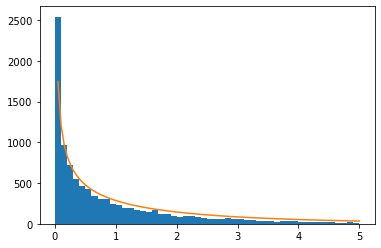

In [5]:
# y = x**2

N = 10000
num_bins=50



fig3, ax3 = plt.subplots(1) 
x = np.random.randn(N) 
y = x ** 2
ax3.hist(y, bins=num_bins, range=(0,5))

# exact distribution
sigma = 1
mean = 0
x_values = np.linspace(0,5,100)
y_exact = (1 / (np.sqrt(2 * np.pi * x_values) * sigma))  # sigma = 1
y_exact *= np.exp(-(x_values - mean)/(2+sigma**2))
y_exact *= N * (5/num_bins) # Normalization constant = total area of hist = N * (range / bins)

ax3.plot(x_values, y_exact)

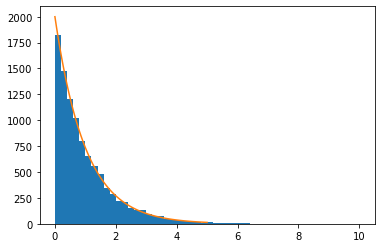

In [8]:
# Inverse CDF method

# f = exp(-y)

N = 10000
num_bins=50



fig4, ax4 = plt.subplots(1) 
x = np.random.rand(N) 
y = - np.log(1-x)
ax4.hist(y, bins=num_bins, range = (0,10))

# exact distribution
x_values = np.linspace(0,5,100)
y_exact = np.exp(-x_values)  # sigma = 1
y_exact *= N * (10/num_bins) # Normalization constant = total area of hist = N * (range / bins)

ax4.plot(x_values, y_exact)


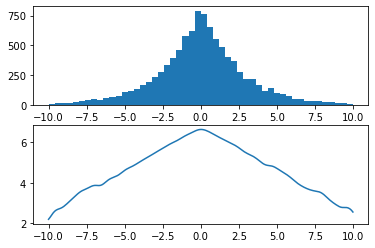

In [57]:
# Simulation from non-standard densities.
alpha = 0.3
x = np.random.rand(N) 


N = 10000
num_bins=50
ran = 20

fig5, ax5 = plt.subplots(2) 
x = np.random.rand(N)
u = - np.log(1-x) / (alpha**2)

y = [np.random.randn()*np.sqrt(uu) for uu in u]
# double exponential

# hist
ax5[0].hist(y, bins=num_bins, range = (-ran/2,ran/2))

x_values = np.linspace(-ran/2,ran/2,200)

"""
# exact distribution of normal dist, to compare
sigma = 2; mean = 0
y_exact = (1 / (np.sqrt(2 * np.pi) * sigma))  # sigma = 1
y_exact *= np.exp(-((x_values - mean)/sigma)**2 / 2)
y_exact *= N * (20/num_bins) # Normalization constant = total area of hist = N * (range / bins)

ax5[0].plot(x_values, y_exact)
"""

# kernal smooth
ks_density = ksdensity(y, width=0.3) 
ax5[1].plot(x_values, np.log(ks_density(x_values) * N * (ran/num_bins)))
